<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/Sujair/05-Weather/Nb_05_Wthr_data_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [4]:
df = pd.read_csv('forestfires.csv')

In [5]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
X = df.drop(['month','day','area'],axis=1)
y = df['area']

# MI - Mutual Information

In [9]:
from sklearn.feature_selection import mutual_info_regression


mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI': mi}).sort_values(by='MI', ascending=False)
print(mi_df)

  Feature        MI
4      DC  0.057951
5     ISI  0.048565
7      RH  0.045082
3     DMC  0.030141
6    temp  0.029503
2    FFMC  0.018636
9    rain  0.014752
8    wind  0.004732
1       Y  0.000000
0       X  0.000000


# Corr

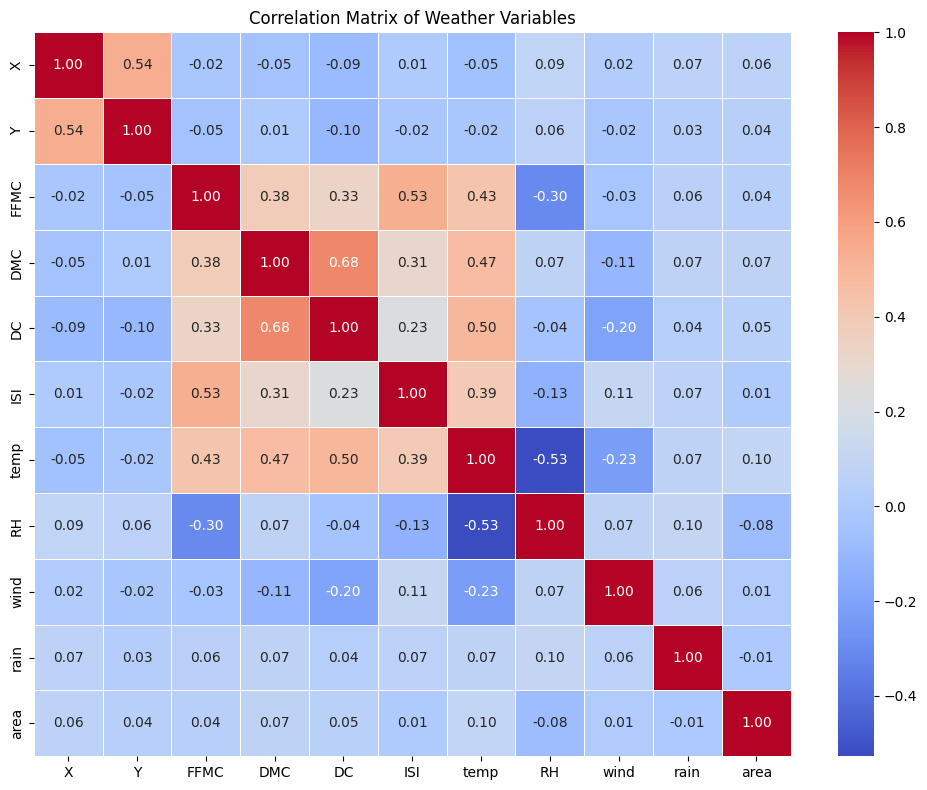

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Title = "Weather"
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title(f"Correlation Matrix of {Title} Variables")
plt.tight_layout()
plt.show()

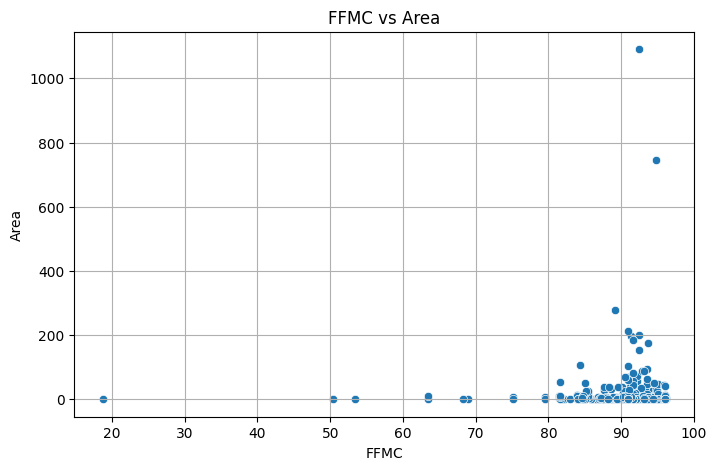

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=numeric_df,
    x='FFMC',
    y='area'
)

plt.xlabel("FFMC")
plt.ylabel("Area")
plt.title("FFMC vs Area")
plt.grid(True)
plt.show()

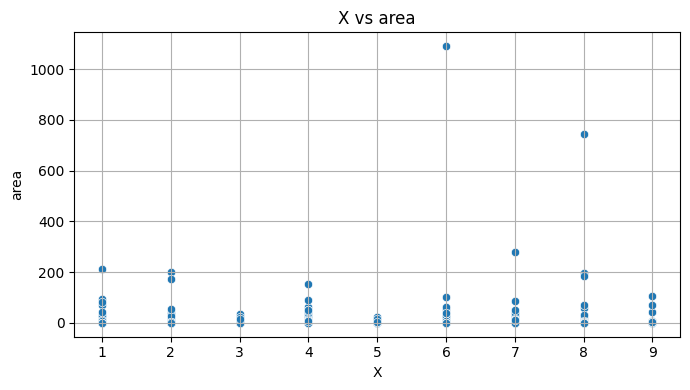

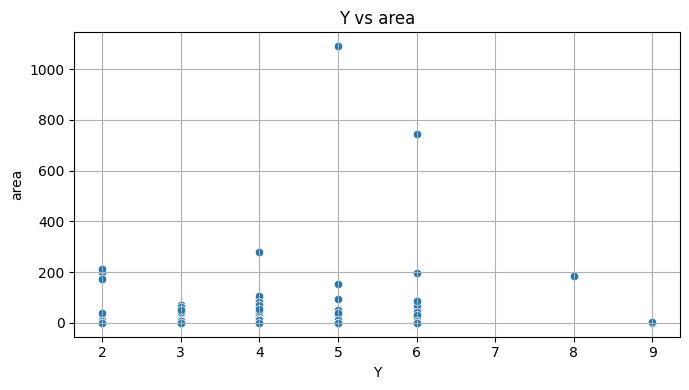

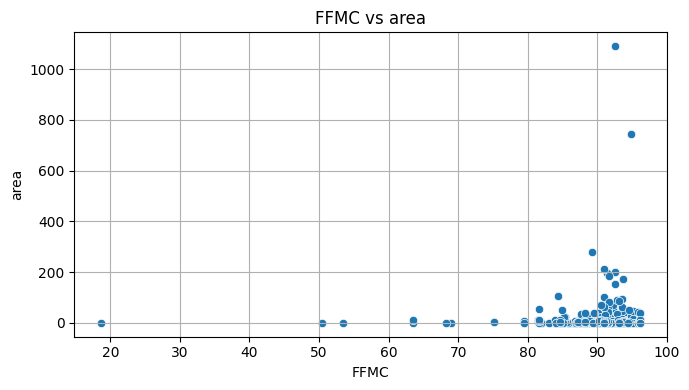

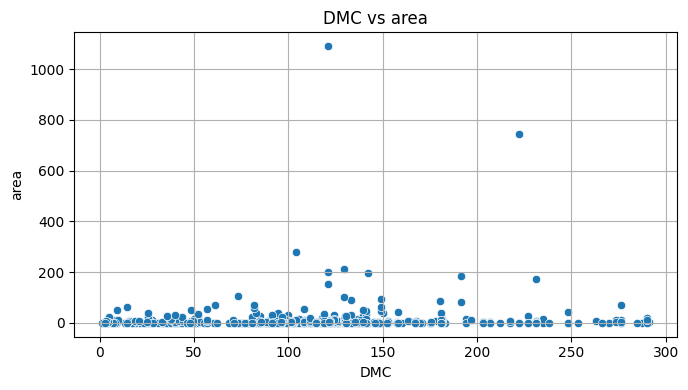

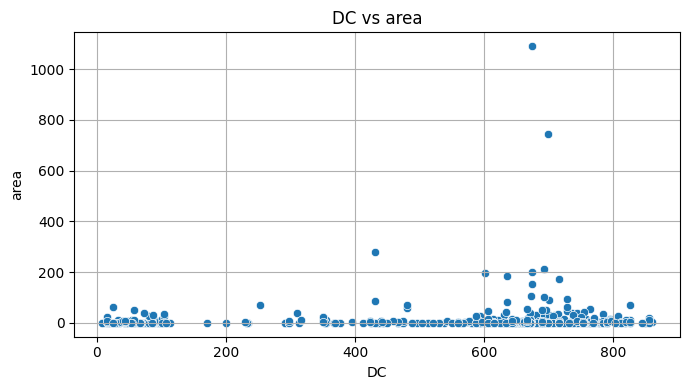

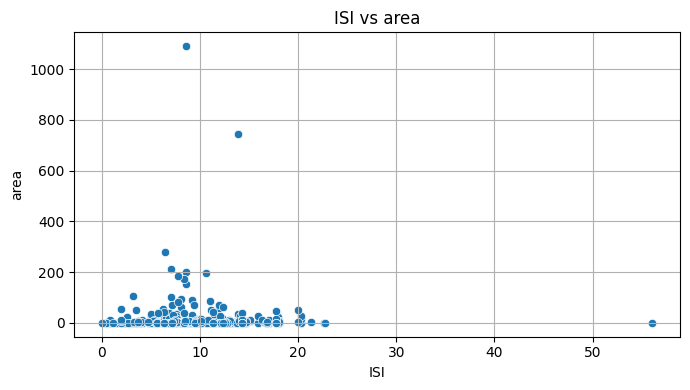

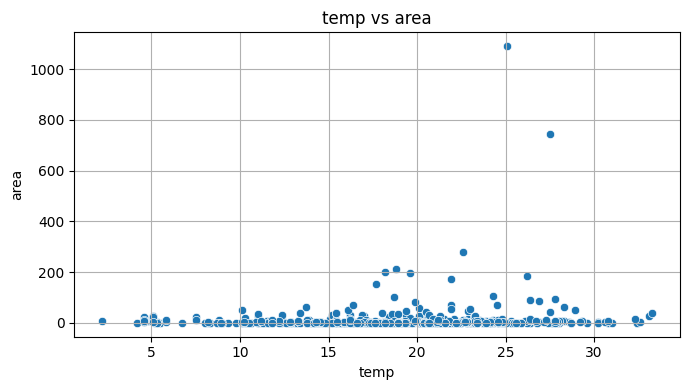

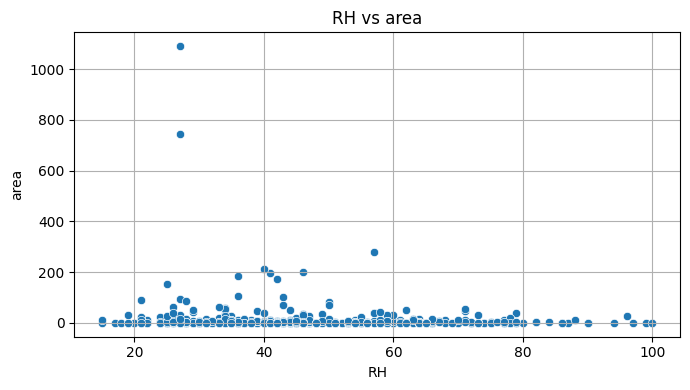

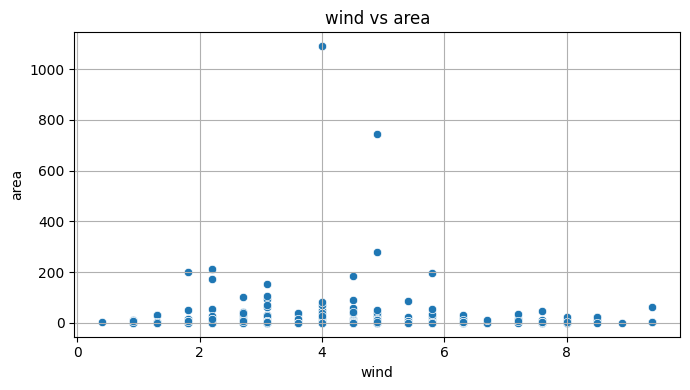

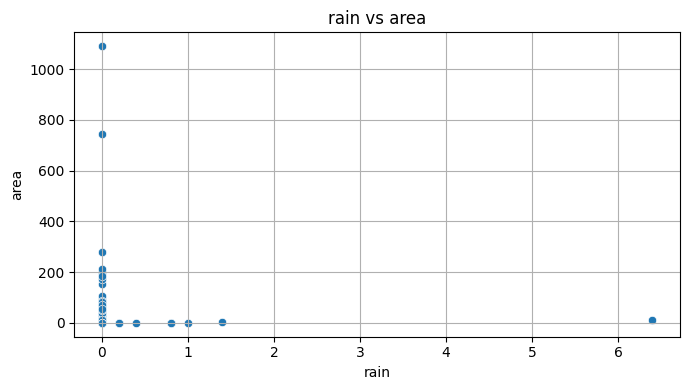

In [15]:
features = X
target = 'area'

for feature in features:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=numeric_df, x=feature, y=target)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

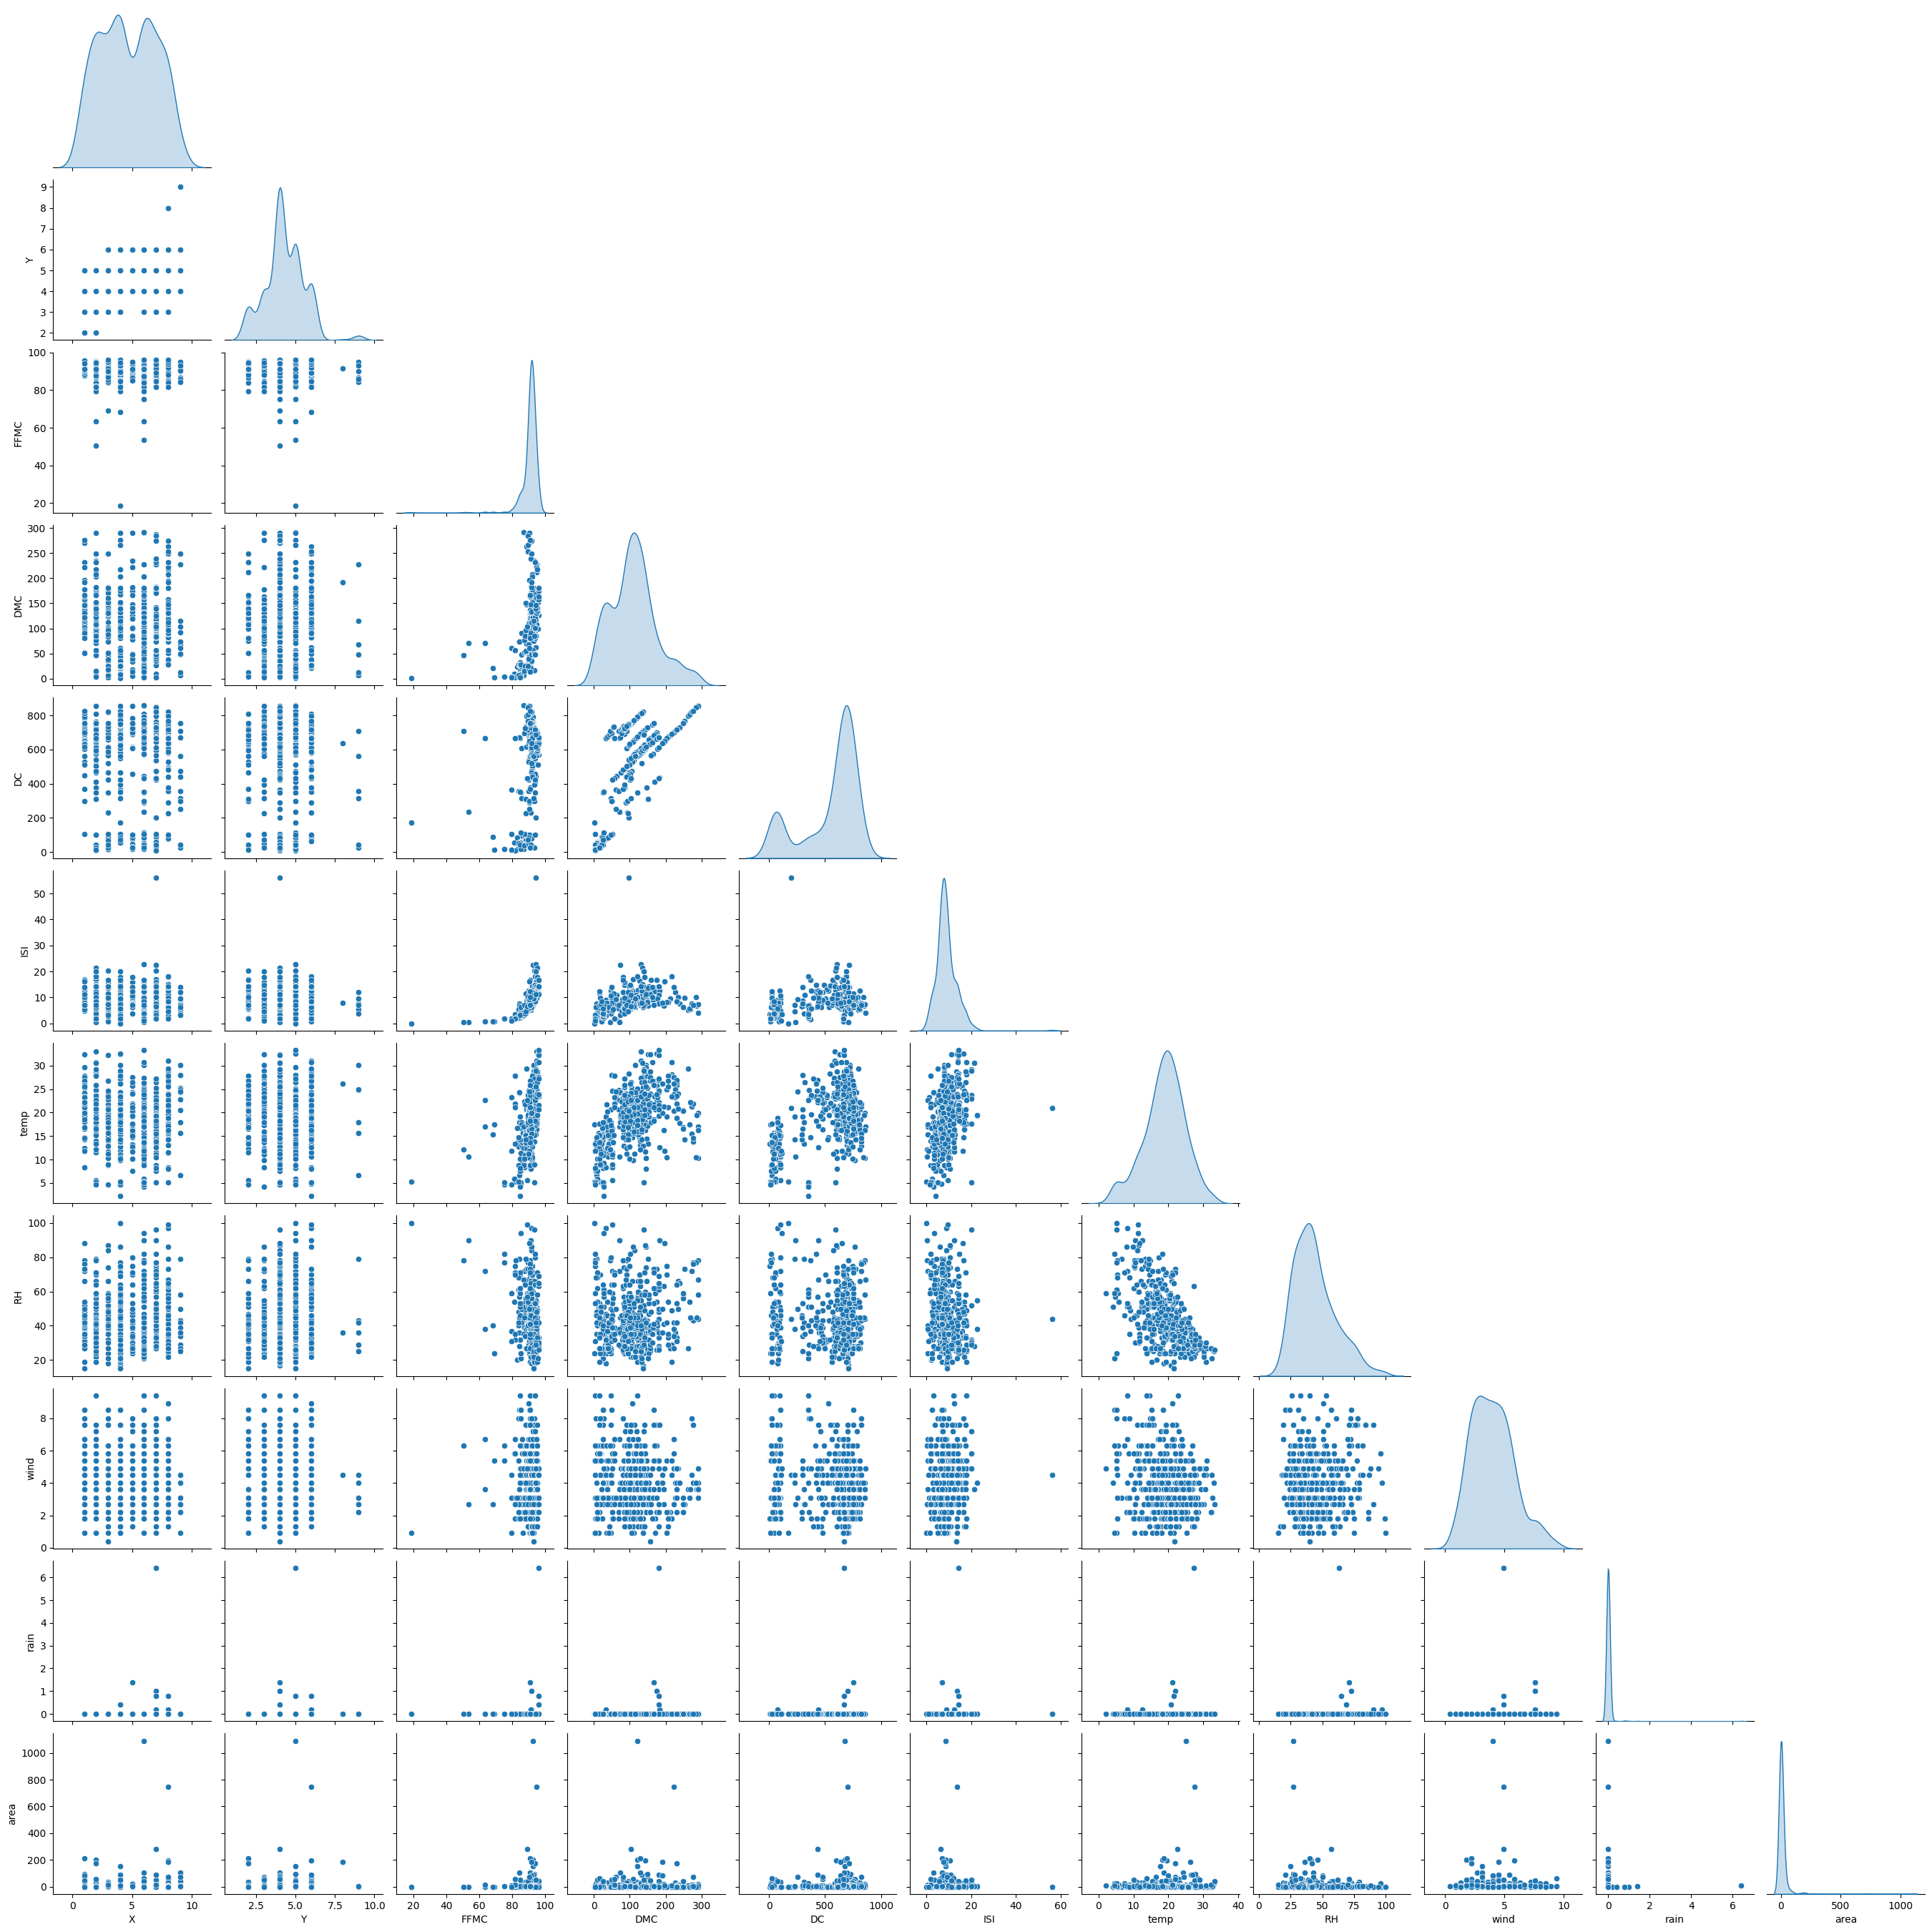

In [16]:
sns.pairplot(
    numeric_df,
    diag_kind="kde",
    corner=True
)
plt.show()

# Partial Dependence

/tmp/ipython-input-1973299793.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


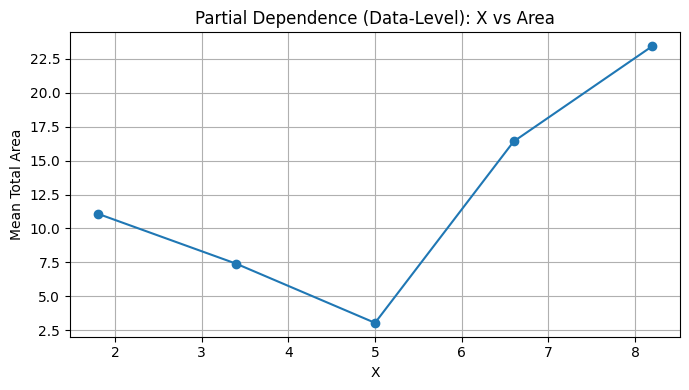

/tmp/ipython-input-1973299793.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


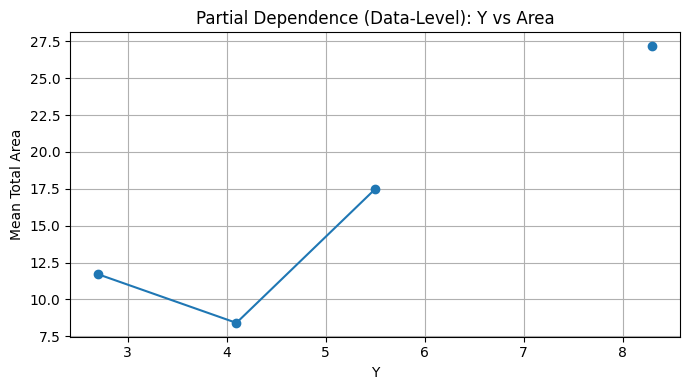

/tmp/ipython-input-1973299793.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


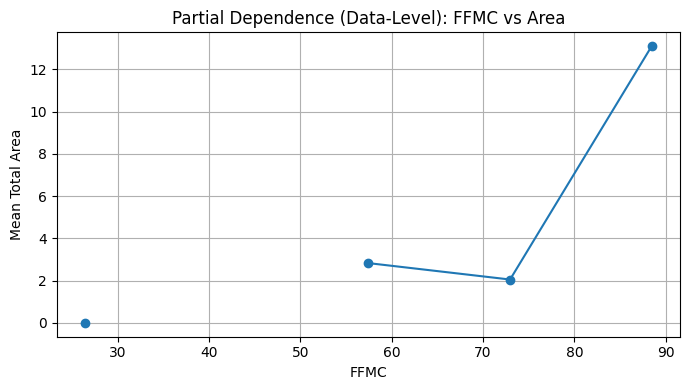

/tmp/ipython-input-1973299793.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


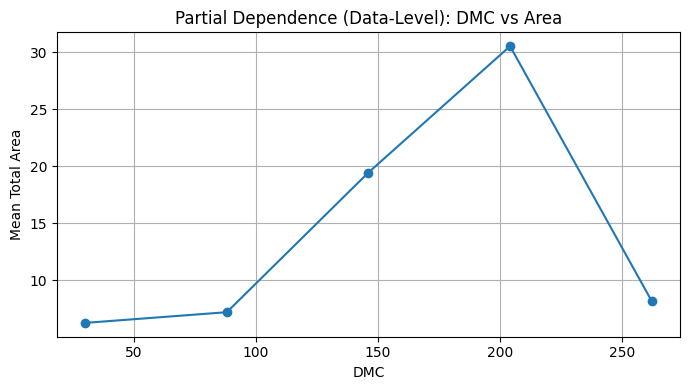

/tmp/ipython-input-1973299793.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


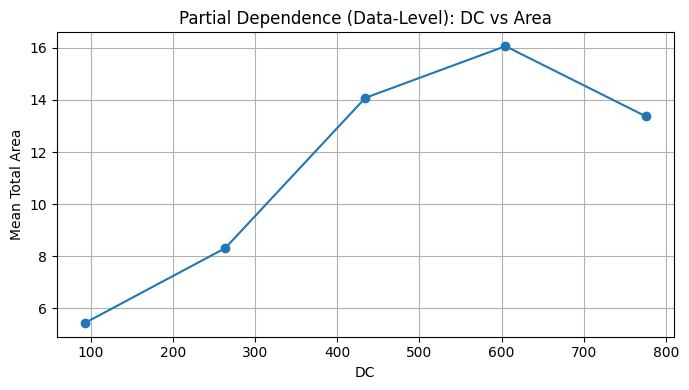

/tmp/ipython-input-1973299793.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


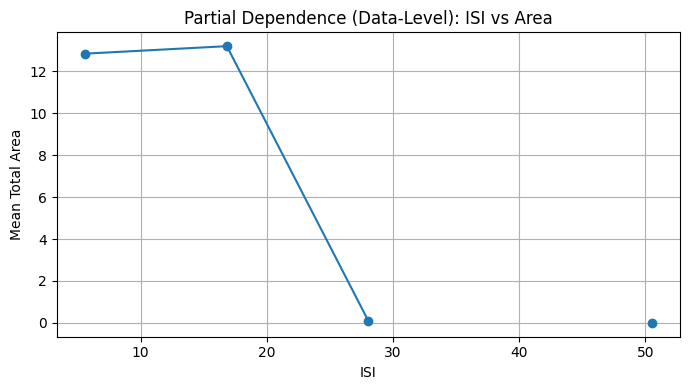

/tmp/ipython-input-1973299793.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


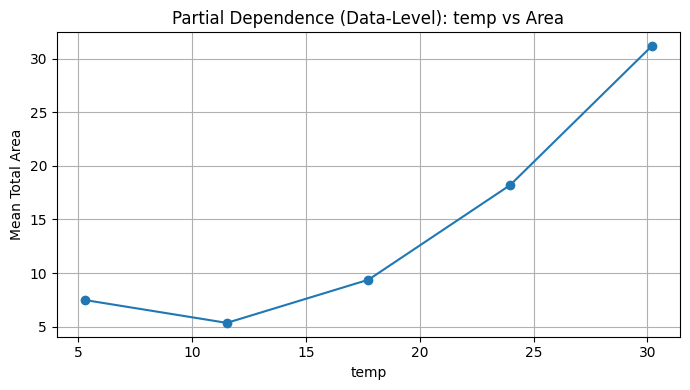

/tmp/ipython-input-1973299793.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


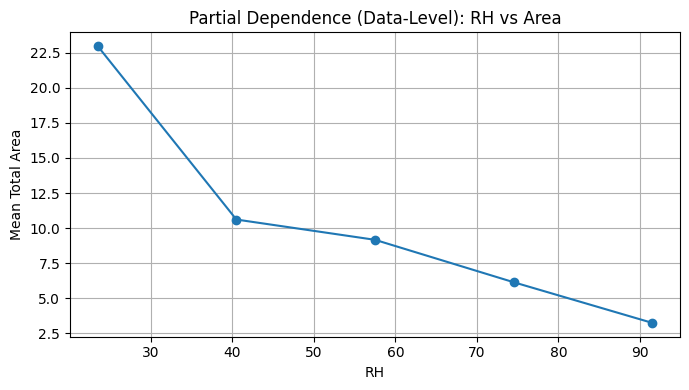

/tmp/ipython-input-1973299793.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


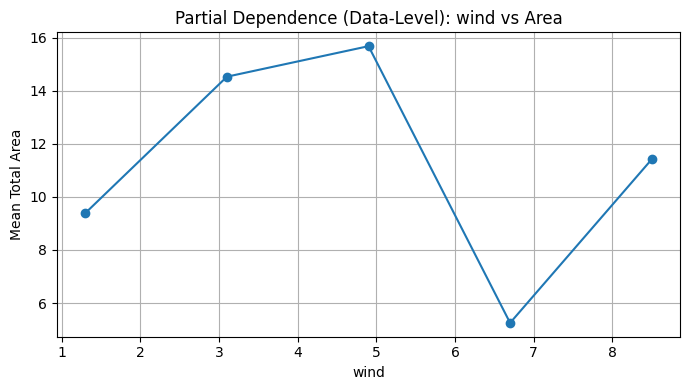

/tmp/ipython-input-1973299793.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


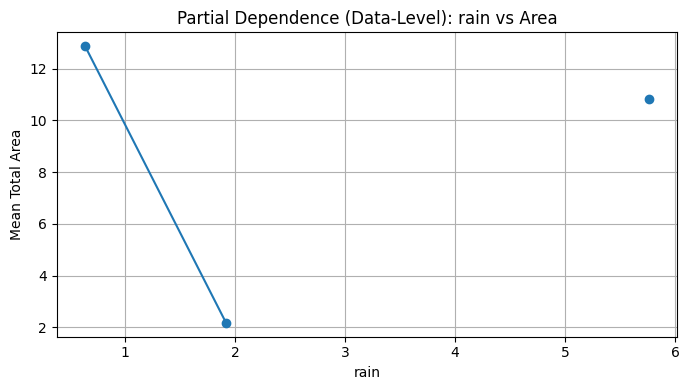

In [17]:
import numpy as np
import matplotlib.pyplot as plt

target = 'area'
numeric_features = numeric_df.select_dtypes(include=['int64', 'float64']).columns.drop(target)

num_bins = 6

for feature in numeric_features:
    temp_df = numeric_df[[feature, target]].dropna().copy()

    # Create bin edges (must be monotonically increasing)
    bin_edges = np.linspace(
        temp_df[feature].min(),
        temp_df[feature].max(),
        num_bins
    )

    # Assign bins correctly
    temp_df['bin'] = pd.cut(
        temp_df[feature],
        bins=bin_edges,
        include_lowest=True
    )

    # Mean target per bin
    mean_production = temp_df.groupby('bin')[target].mean()
    bin_centers = [interval.mid for interval in mean_production.index]

    # Plot
    plt.figure(figsize=(7, 4))
    plt.plot(bin_centers, mean_production.values, marker='o')
    plt.xlabel(feature)
    plt.ylabel("Mean Total Area")
    plt.title(f"Partial Dependence (Data-Level): {feature} vs Area")
    plt.grid(True)
    plt.tight_layout()
    plt.show()